Columns in crime_df: ['Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'District', 'Ward', 'Community Area', 'Year', 'Latitude', 'Longitude']
   Community Area  total_crimes  total_arrests  arrest_rate
0             0.0            59              8     0.135593
1             1.0        109350          28723     0.262670
2             2.0         90609          14721     0.162467
3             3.0        103778          30635     0.295197
4             4.0         50640           8948     0.176698


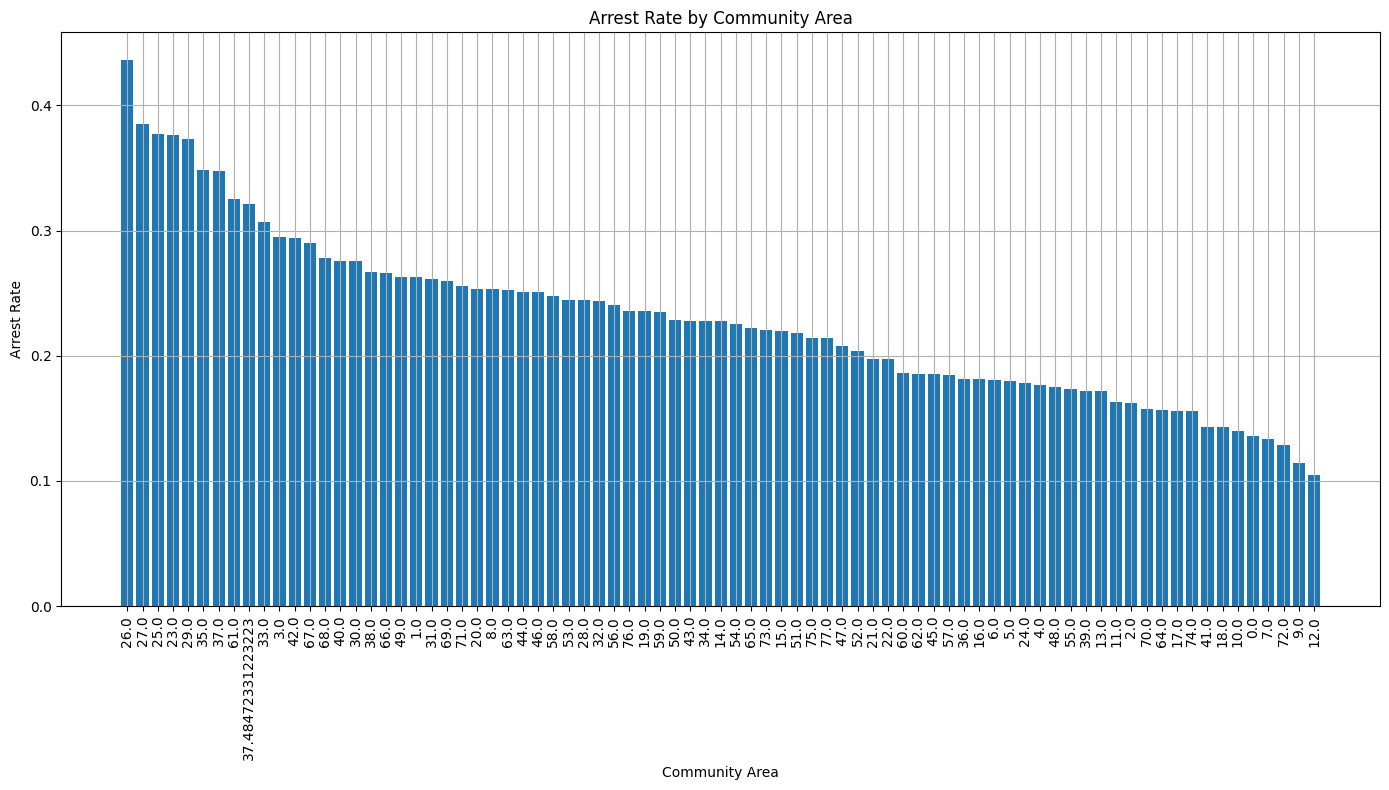

In [3]:

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Load the Cleaned Crime Data ---
crime_df = pd.read_csv('../data/CleanedCrime.csv')

# --- Quick Peek at Columns ---
print("Columns in crime_df:", crime_df.columns.tolist())
crime_df.head()

# --- Confirm Necessary Columns ---
# We need 'Community Area', 'Date', 'Arrest'
if 'Community Area' not in crime_df.columns:
    raise Exception("Community Area column missing from data!")
if 'Date' not in crime_df.columns:
    raise Exception("Date column missing from data!")
if 'Arrest' not in crime_df.columns:
    raise Exception("Arrest column missing from data!")

# --- Group by Community Area ---
arrest_by_area = crime_df.groupby('Community Area').agg(
    total_crimes=('Date', 'count'),      # Count total incidents
    total_arrests=('Arrest', 'sum')       # Sum arrests
).reset_index()

# --- Calculate Arrest Rate ---
arrest_by_area['arrest_rate'] = arrest_by_area['total_arrests'] / arrest_by_area['total_crimes']

# --- Preview Arrest Rate Table ---
print(arrest_by_area.head())

# --- Plot: Arrest Rate by Community Area ---
plt.figure(figsize=(14,8))

# Sort areas by highest arrest rate
sorted_areas = arrest_by_area.sort_values('arrest_rate', ascending=False)

plt.bar(sorted_areas['Community Area'].astype(str), sorted_areas['arrest_rate'])
plt.xticks(rotation=90)
plt.title('Arrest Rate by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.tight_layout()
plt.show()
